In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from pathlib import Path
from datetime import datetime
import logging
from typing import List, Tuple



In [32]:


circuits = pd.read_csv("F1DashboardProject/data/circuits.csv")
races = pd.read_csv("F1DashboardProject/data/races.csv")
drivers = pd.read_csv("F1DashboardProject/data/drivers.csv")
constructors = pd.read_csv("F1DashboardProject/data/constructors.csv")
results = pd.read_csv("F1DashboardProject/data/results.csv")
pit_stops = pd.read_csv("F1DashboardProject/data/pit_stops.csv")
lap_times = pd.read_csv("F1DashboardProject/data/lap_times.csv")
qualifying = pd.read_csv("F1DashboardProject/data/qualifying.csv")
status = pd.read_csv("F1DashboardProject/data/status.csv")
driver_standings = pd.read_csv("F1DashboardProject/data/driver_standings.csv")
constructor_standings = pd.read_csv("F1DashboardProject/data/constructor_standings.csv")


print(f"Circuits: {circuits.shape[0]} records | Races: {races.shape[0]} records")
print(f"Drivers: {drivers.shape[0]} records | Results: {results.shape[0]} records")


Circuits: 77 records | Races: 1125 records
Drivers: 861 records | Results: 26759 records


In [34]:

print(f"circuits: {circuits.shape}")
print(f"races: {races.shape}")
print(f"drivers: {drivers.shape}")
print(f"constructors: {constructors.shape}")
print(f"results: {results.shape}")
print(f"pit_stops: {pit_stops.shape}")
print(f"lap_times: {lap_times.shape}")

print("\n" + "="*60)
print("RESULTS COLUMNS:")
print("="*60)
print(results.head())

circuits: (77, 9)
races: (1125, 18)
drivers: (861, 9)
constructors: (212, 5)
results: (26759, 18)
pit_stops: (11371, 7)
lap_times: (589081, 6)

RESULTS COLUMNS:
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.

In [36]:
# Standardize column names
races.rename(columns={
    "name": "raceName",
    "date": "raceDate"
}, inplace=True)

circuits.rename(columns={"name": "circuitName"}, inplace=True)


In [38]:
# Convert date column
races["raceDate"] = pd.to_datetime(races["raceDate"], errors='coerce')
races["year"] = races["year"].astype("int32")


In [42]:
# Merge races with circuits
races_circuits = pd.merge(races, circuits[["circuitId", "circuitName", "location", "country"]], 
                          on="circuitId", how="left")

print("Races and circuits cleaned!")
print(f"races_circuits shape: {races_circuits.shape}")
print(races_circuits.head())

Races and circuits cleaned!
races_circuits shape: (1125, 21)
   raceId  year  round  circuitId               raceName   raceDate      time  \
0       1  2009      1          1  Australian Grand Prix 2009-03-29  06:00:00   
1       2  2009      2          2   Malaysian Grand Prix 2009-04-05  09:00:00   
2       3  2009      3         17     Chinese Grand Prix 2009-04-19  07:00:00   
3       4  2009      4          3     Bahrain Grand Prix 2009-04-26  12:00:00   
4       5  2009      5          4     Spanish Grand Prix 2009-05-10  12:00:00   

                                                 url fp1_date fp1_time  ...  \
0  http://en.wikipedia.org/wiki/2009_Australian_G...       \N       \N  ...   
1  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N       \N  ...   
2  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N       \N  ...   
3  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N       \N  ...   
4  http://en.wikipedia.org/wiki/2009_Spanish_Gran...     

In [46]:
# Merge results with drivers, constructors, and races
merged = pd.merge(results, drivers, on="driverId", how="left")
merged = pd.merge(merged, constructors, on="constructorId", how="left")
merged = pd.merge(merged, races_circuits, on="raceId", how="left")

print(f" Merged results shape: {merged.shape}")
print(f"Columns: {merged.shape[1]}")


 Merged results shape: (26759, 50)
Columns: 50


In [48]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   resultId         26759 non-null  int64         
 1   raceId           26759 non-null  int64         
 2   driverId         26759 non-null  int64         
 3   constructorId    26759 non-null  int64         
 4   number_x         26759 non-null  object        
 5   grid             26759 non-null  int64         
 6   position         26759 non-null  object        
 7   positionText     26759 non-null  object        
 8   positionOrder    26759 non-null  int64         
 9   points           26759 non-null  float64       
 10  laps             26759 non-null  int64         
 11  time_x           26759 non-null  object        
 12  milliseconds     26759 non-null  object        
 13  fastestLap       26759 non-null  object        
 14  rank             26759 non-null  objec

In [50]:
merged

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitName,location,country
0,1,18,1,1,22,1,1,1,1,10.0,...,\N,\N,\N,\N,\N,\N,\N,Albert Park Grand Prix Circuit,Melbourne,Australia
1,2,18,2,2,3,5,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,Albert Park Grand Prix Circuit,Melbourne,Australia
2,3,18,3,3,7,7,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,\N,Albert Park Grand Prix Circuit,Melbourne,Australia
3,4,18,4,4,5,11,4,4,4,5.0,...,\N,\N,\N,\N,\N,\N,\N,Albert Park Grand Prix Circuit,Melbourne,Australia
4,5,18,5,1,23,3,5,5,5,4.0,...,\N,\N,\N,\N,\N,\N,\N,Albert Park Grand Prix Circuit,Melbourne,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,26760,1144,825,210,20,14,16,16,16,0.0,...,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,\N,\N,Yas Marina Circuit,Abu Dhabi,UAE
26755,26761,1144,859,215,30,12,17,17,17,0.0,...,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,\N,\N,Yas Marina Circuit,Abu Dhabi,UAE
26756,26762,1144,822,15,77,9,\N,R,18,0.0,...,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,\N,\N,Yas Marina Circuit,Abu Dhabi,UAE
26757,26763,1144,861,3,43,20,\N,R,19,0.0,...,13:00:00,2024-12-07,10:30:00,2024-12-07,14:00:00,\N,\N,Yas Marina Circuit,Abu Dhabi,UAE


In [52]:


lap_agg = lap_times.groupby(["raceId", "driverId"])["milliseconds"].agg([
    ("avgLapTime", "mean"),
    ("fastestLapTime", "min"),
    ("lapTimeStdDev", "std")
]).reset_index()

merged = pd.merge(merged, lap_agg, on=["raceId", "driverId"], how="left")

print(" Lap times aggregated!")
print(lap_agg.head())

 Lap times aggregated!
   raceId  driverId    avgLapTime  fastestLapTime  lapTimeStdDev
0       1         1  97563.758621           89020   16066.158258
1       1         2  97635.672414           88283   14275.663645
2       1         3  97612.172414           87706   16311.606142
3       1         4  97597.637931           88712   16337.006698
4       1         6  91822.235294           89923    3476.084499


In [56]:
# Check the problematic values
print(pit_stops['duration'].unique()[:20])  # Show first 20 unique values


['26.898' '25.021' '23.426' '23.251' '23.842' '23.643' '22.603' '24.863'
 '25.259' '25.342' '22.994' '23.227' '24.535' '23.716' '24.064' '25.978'
 '24.899' '16.867' '24.463' '24.865']


In [58]:
# Clean the duration column - remove any non-numeric characters except dots
pit_stops['duration_clean'] = pd.to_numeric(
    pit_stops['duration'].str.replace(r'[^\d.]', '', regex=True), 
    errors='coerce'
)


In [60]:
# Check for any remaining NaN values that couldn't be converted
print(f"Number of NaN values after conversion: {pit_stops['duration_clean'].isna().sum()}")
print(pit_stops[pit_stops['duration_clean'].isna()]['duration'].head())


Number of NaN values after conversion: 0
Series([], Name: duration, dtype: object)


In [64]:
# Now use the cleaned column for aggregation
pit_agg = pit_stops.groupby(["raceId", "driverId"]).agg({
    "stop": "count",
    "duration_clean": ["mean", "min", "max"]
}).reset_index()

pit_agg.columns = ["raceId", "driverId", "pitStopsCount", "avgPitStopDuration", 
                   "minPitStopDuration", "maxPitStopDuration"]

merged = pd.merge(merged, pit_agg, on=["raceId", "driverId"], how="left")

print("Pit stops aggregated!")
print(pit_agg.head())

Pit stops aggregated!
   raceId  driverId  pitStopsCount  avgPitStopDuration  minPitStopDuration  \
0     841         1              2              23.213              23.199   
1     841         2              2              24.046              22.994   
2     841         3              1              23.716              23.716   
3     841         4              3              24.055              23.251   
4     841         5              1              24.865              24.865   

   maxPitStopDuration  
0              23.227  
1              25.098  
2              23.716  
3              24.733  
4              24.865  


In [66]:


qual_data = qualifying[["raceId", "driverId", "position"]].rename(
    columns={"position": "qualPosition"}
)
qual_data = qual_data.drop_duplicates(subset=["raceId", "driverId"], keep="first")

merged = pd.merge(merged, qual_data, on=["raceId", "driverId"], how="left")

print(" Qualifying data added!")


 Qualifying data added!


In [68]:
merged

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,location,country,avgLapTime,fastestLapTime_y,lapTimeStdDev,pitStopsCount,avgPitStopDuration,minPitStopDuration,maxPitStopDuration,qualPosition
0,1,18,1,1,22,1,1,1,1,10.0,...,Melbourne,Australia,98114.068966,87452.0,20990.356845,NaN,NaN,NaN,NaN,1.0
1,2,18,2,2,3,5,2,2,2,8.0,...,Melbourne,Australia,98208.517241,87739.0,20212.298423,NaN,NaN,NaN,NaN,5.0
2,3,18,3,3,7,7,3,3,3,6.0,...,Melbourne,Australia,98254.810345,88090.0,18957.199698,NaN,NaN,NaN,NaN,7.0
3,4,18,4,4,5,11,4,4,4,5.0,...,Melbourne,Australia,98410.293103,88603.0,19640.823974,NaN,NaN,NaN,NaN,12.0
4,5,18,5,1,23,3,5,5,5,4.0,...,Melbourne,Australia,98424.655172,87418.0,21826.401776,NaN,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,26760,1144,825,210,20,14,16,16,16,0.0,...,Abu Dhabi,UAE,92471.719298,85637.0,7251.481525,4.0,23.2365,21.678,26.363,15.0
26755,26761,1144,859,215,30,12,17,17,17,0.0,...,Abu Dhabi,UAE,92308.163636,88751.0,7168.780388,3.0,26.0990,22.565,32.317,12.0
26756,26762,1144,822,15,77,9,\N,R,18,0.0,...,Abu Dhabi,UAE,94909.333333,89482.0,12734.899632,1.0,41.1440,41.144,41.144,9.0
26757,26763,1144,861,3,43,20,\N,R,19,0.0,...,Abu Dhabi,UAE,95016.538462,89411.0,10855.300667,1.0,24.9410,24.941,24.941,19.0


Create Advanced Features

In [70]:
# Type conversions
merged["positionOrder"] = pd.to_numeric(merged["positionOrder"], errors='coerce')
merged["grid"] = pd.to_numeric(merged["grid"], errors='coerce')
merged["points"] = pd.to_numeric(merged["points"], errors='coerce')
merged["laps"] = pd.to_numeric(merged["laps"], errors='coerce')
merged["avgLapTime"] = pd.to_numeric(merged["avgLapTime"], errors='coerce')



In [72]:
# 1. Position-based features
merged["finishPosition"] = merged["positionOrder"]
merged["gridToFinish"] = merged["positionOrder"] - merged["grid"]
merged["isFinished"] = (merged["laps"] > 0).astype(int)
merged["isClassified"] = (~merged["positionOrder"].isna()).astype(int)


In [74]:
# 2. Performance features
merged["isDNF"] = ((merged["isFinished"] == 0) & (merged["isClassified"] == 0)).astype(int)
merged["isPodium"] = (merged["positionOrder"] <= 3).astype(int)
merged["isWin"] = (merged["positionOrder"] == 1).astype(int)


In [76]:
# 3. Overtaking indicators
merged["overtaken"] = (merged["gridToFinish"] < 0).astype(int)
merged["overtakesCount"] = np.where(merged["gridToFinish"] < 0, abs(merged["gridToFinish"]), 0)


In [78]:
# 4. Qualify vs Race performance
merged["qualToRaceChange"] = merged["positionOrder"] - merged["qualPosition"]


In [80]:
# 5. Pit stop metrics
merged["pitStopsCount"] = merged["pitStopsCount"].fillna(0)
merged["avgPitStopDuration"] = merged["avgPitStopDuration"].fillna(0)


In [82]:
# 6. Consistency metrics
merged["lapTimeConsistency"] = merged.groupby("raceId")["avgLapTime"].transform(
    lambda x: (x - x.mean()).abs() if x.notna().any() else np.nan
)

In [90]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 69 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   resultId            26759 non-null  int64         
 1   raceId              26759 non-null  int64         
 2   driverId            26759 non-null  int64         
 3   constructorId       26759 non-null  int64         
 4   number_x            26759 non-null  object        
 5   grid                26759 non-null  int64         
 6   position            26759 non-null  object        
 7   positionText        26759 non-null  object        
 8   positionOrder       26759 non-null  int64         
 9   points              26759 non-null  float64       
 10  laps                26759 non-null  int64         
 11  time_x              26759 non-null  object        
 12  milliseconds        26759 non-null  object        
 13  fastestLap          26759 non-null  object    

In [92]:
# Select relevant columns
final_columns = [
    "raceId", "year", "round", "raceName", "raceDate", "circuitName", "location", "country",
    "driverId", "driverRef", "constructorId", "constructorRef",
    "grid", "finishPosition", "positionOrder", "points", "laps",
    "avgLapTime", "fastestLapTime_y", "lapTimeStdDev", "lapTimeConsistency",  # Changed fastestLapTime to fastestLapTime_y
    "gridToFinish", "qualPosition", "qualToRaceChange",
    "isFinished", "isClassified", "isDNF", "isPodium", "isWin",
    "overtaken", "overtakesCount",
    "pitStopsCount", "avgPitStopDuration", "minPitStopDuration", "maxPitStopDuration",
    "statusId"  # Changed status to statusId (the column that exists in your DataFrame)
]


final_df = merged[final_columns].copy()

In [94]:
# Remove rows with missing critical values
final_df.dropna(subset=["year", "driverRef", "constructorRef"], inplace=True)


In [96]:
# Fill NaN values
final_df["gridToFinish"] = final_df["gridToFinish"].fillna(0)
final_df["qualToRaceChange"] = final_df["qualToRaceChange"].fillna(0)
final_df["pitStopsCount"] = final_df["pitStopsCount"].fillna(0)


In [98]:
print(f"Shape: {final_df.shape}")
print(f"\nData types:\n{final_df.dtypes}")
print(f"\nFirst rows:\n{final_df.head()}")

Shape: (26759, 36)

Data types:
raceId                         int64
year                           int32
round                          int64
raceName                      object
raceDate              datetime64[ns]
circuitName                   object
location                      object
country                       object
driverId                       int64
driverRef                     object
constructorId                  int64
constructorRef                object
grid                           int64
finishPosition                 int64
positionOrder                  int64
points                       float64
laps                           int64
avgLapTime                   float64
fastestLapTime_y             float64
lapTimeStdDev                float64
lapTimeConsistency           float64
gridToFinish                   int64
qualPosition                 float64
qualToRaceChange             float64
isFinished                     int64
isClassified                   int64
isDNF 

In [100]:
print(f"Total Records: {len(final_df):,}")
print(f"Year Range: {final_df['year'].min():.0f} - {final_df['year'].max():.0f}")
print(f"Unique Drivers: {final_df['driverRef'].nunique()}")
print(f"Unique Constructors: {final_df['constructorRef'].nunique()}")
print(f"Unique Races: {final_df['raceId'].nunique()}")
print(f"Unique Seasons: {final_df['year'].nunique()}")
print(f"\nCompletion Rate: {(final_df['isFinished'].sum() / len(final_df) * 100):.1f}%")
print(f"DNF Rate: {(final_df['isDNF'].sum() / len(final_df) * 100):.1f}%")
print(f"Podium Rate: {(final_df['isPodium'].sum() / len(final_df) * 100):.1f}%")
print(f"\nAverage Points (Scored): {final_df[final_df['points'] > 0]['points'].mean():.2f}")
print(f"Average Pit Stops: {final_df['pitStopsCount'].mean():.2f}")


Total Records: 26,759
Year Range: 1950 - 2024
Unique Drivers: 861
Unique Constructors: 211
Unique Races: 1125
Unique Seasons: 75

Completion Rate: 90.5%
DNF Rate: 0.0%
Podium Rate: 12.7%

Average Points (Scored): 6.51
Average Pit Stops: 0.42


Generate Driver Season Statistics

In [102]:
driver_stats = final_df.groupby(["year", "driverRef"]).agg({
    "isWin": "sum",
    "isPodium": "sum",
    "points": "sum",
    "isFinished": "sum",
    "isDNF": "sum",
    "avgLapTime": "mean",
    "overtakesCount": "sum",
    "raceId": "count"
}).reset_index()

driver_stats.columns = ["year", "driver", "wins", "podiums", "totalPoints", 
                       "finishes", "dnfs", "avgLapTime", "totalOvertakes", "raceCount"]


In [104]:
driver_stats["finishRate"] = (driver_stats["finishes"] / driver_stats["raceCount"] * 100).round(2)
driver_stats["podiumRate"] = (driver_stats["podiums"] / driver_stats["raceCount"] * 100).round(2)
driver_stats["avgPointsPerRace"] = (driver_stats["totalPoints"] / driver_stats["raceCount"]).round(2)

driver_stats = driver_stats.sort_values(["year", "totalPoints"], ascending=[False, False])


In [136]:
driver_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3211 entries, 3199 to 79
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              3211 non-null   int32  
 1   driver            3211 non-null   object 
 2   wins              3211 non-null   int64  
 3   podiums           3211 non-null   int64  
 4   totalPoints       3211 non-null   float64
 5   finishes          3211 non-null   int64  
 6   dnfs              3211 non-null   int64  
 7   avgLapTime        693 non-null    float64
 8   totalOvertakes    3211 non-null   int64  
 9   raceCount         3211 non-null   int64  
 10  finishRate        3211 non-null   float64
 11  podiumRate        3211 non-null   float64
 12  avgPointsPerRace  3211 non-null   float64
dtypes: float64(5), int32(1), int64(6), object(1)
memory usage: 338.7+ KB


In [106]:
driver_stats 

,year,driver,wins,podiums,totalPoints,finishes,dnfs,avgLapTime,totalOvertakes,raceCount,finishRate,podiumRate,avgPointsPerRace
3199,2024,max_verstappen,9,14,399.0,24,0,95365.700201,30,24,100.0,58.33,16.62
3200,2024,norris,4,13,344.0,24,0,95309.857319,20,24,100.0,54.17,14.33
3198,2024,leclerc,3,13,327.0,24,0,95675.011037,44,24,100.0,54.17,13.62
3203,2024,piastri,2,8,265.0,24,0,95516.606720,29,24,100.0,33.33,11.04
3206,2024,sainz,2,9,262.0,23,0,96153.980453,21,23,100.0,39.13,11.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1950,trintignant,0,0,0.0,1,0,NaN,0,2,50.0,0.00,0.00
76,1950,villoresi,0,0,0.0,3,0,NaN,0,3,100.0,0.00,0.00
77,1950,wallard,0,0,0.0,1,0,NaN,17,1,100.0,0.00,0.00
78,1950,walt_brown,0,0,0.0,1,0,NaN,1,1,100.0,0.00,0.00


In [108]:
print(driver_stats.head(10))
driver_stats.to_csv("driver_season_stats.csv", index=False)


      year          driver  wins  podiums  totalPoints  finishes  dnfs  \
3199  2024  max_verstappen     9       14        399.0        24     0   
3200  2024          norris     4       13        344.0        24     0   
3198  2024         leclerc     3       13        327.0        24     0   
3203  2024         piastri     2        8        265.0        24     0   
3206  2024           sainz     2        9        262.0        23     0   
3205  2024         russell     2        4        226.0        24     0   
3194  2024        hamilton     2        5        207.0        24     0   
3202  2024           perez     0        4        138.0        22     0   
3188  2024          alonso     0        0         70.0        24     0   
3193  2024           gasly     0        1         40.0        23     0   

        avgLapTime  totalOvertakes  raceCount  finishRate  podiumRate  \
3199  95365.700201              30         24      100.00       58.33   
3200  95309.857319              20     

CONSTRUCTOR SEASON STATISTICS

In [110]:
constructor_stats = final_df.groupby(["year", "constructorRef"]).agg({
    "isWin": "sum",
    "isPodium": "sum",
    "points": "sum",
    "isFinished": "sum",
    "isDNF": "sum",
    "raceId": "count"
}).reset_index()

constructor_stats.columns = ["year", "constructor", "wins", "podiums", "totalPoints",
                            "finishes", "dnfs", "raceCount"]


In [112]:
constructor_stats["finishRate"] = (constructor_stats["finishes"] / constructor_stats["raceCount"] * 100).round(2)
constructor_stats["winRate"] = (constructor_stats["wins"] / constructor_stats["raceCount"] * 100).round(2)
constructor_stats["avgPointsPerRace"] = (constructor_stats["totalPoints"] / constructor_stats["raceCount"]).round(2)

constructor_stats = constructor_stats.sort_values(["year", "totalPoints"], ascending=[False, False])


In [114]:
constructor_stats 

,year,constructor,wins,podiums,totalPoints,finishes,dnfs,raceCount,finishRate,winRate,avgPointsPerRace
1105,2024,mclaren,6,21,609.0,48,0,48,100.00,12.50,12.69
1103,2024,ferrari,5,22,595.0,48,0,48,100.00,10.42,12.40
1108,2024,red_bull,9,18,537.0,46,0,48,95.83,18.75,11.19
1106,2024,mercedes,4,9,433.0,48,0,48,100.00,8.33,9.02
1102,2024,aston_martin,0,0,94.0,47,0,48,97.92,0.00,1.96
...,...,...,...,...,...,...,...,...,...,...,...
18,1950,rae,0,0,0.0,1,0,1,100.00,0.00,0.00
20,1950,snowberger,0,0,0.0,1,0,1,100.00,0.00,0.00
21,1950,stevens,0,0,0.0,1,0,1,100.00,0.00,0.00
22,1950,watson,0,0,0.0,1,0,1,100.00,0.00,0.00


In [138]:
constructor_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1111 entries, 1105 to 23
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1111 non-null   int32  
 1   constructor       1111 non-null   object 
 2   wins              1111 non-null   int64  
 3   podiums           1111 non-null   int64  
 4   totalPoints       1111 non-null   float64
 5   finishes          1111 non-null   int64  
 6   dnfs              1111 non-null   int64  
 7   raceCount         1111 non-null   int64  
 8   finishRate        1111 non-null   float64
 9   winRate           1111 non-null   float64
 10  avgPointsPerRace  1111 non-null   float64
dtypes: float64(4), int32(1), int64(5), object(1)
memory usage: 99.8+ KB


In [116]:
print(constructor_stats.head(10))
constructor_stats.to_csv("constructor_season_stats.csv", index=False)



      year   constructor  wins  podiums  totalPoints  finishes  dnfs  \
1105  2024       mclaren     6       21        609.0        48     0   
1103  2024       ferrari     5       22        595.0        48     0   
1108  2024      red_bull     9       18        537.0        46     0   
1106  2024      mercedes     4        9        433.0        48     0   
1102  2024  aston_martin     0        0         94.0        47     0   
1101  2024        alpine     0        2         63.0        45     0   
1104  2024          haas     0        0         51.0        45     0   
1107  2024            rb     0        0         40.0        46     0   
1110  2024      williams     0        0         17.0        43     0   
1109  2024        sauber     0        0          4.0        48     0   

      raceCount  finishRate  winRate  avgPointsPerRace  
1105         48      100.00    12.50             12.69  
1103         48      100.00    10.42             12.40  
1108         48       95.83    18.75

In [118]:
final_df.to_csv("f1_dashboard.csv", index=False)
print(f" Saved f1_dashboard.csv ({len(final_df):,} records)")
print(f"Columns: {final_df.shape[1]}")


 Saved f1_dashboard.csv (26,759 records)
Columns: 36


 Quick Data Validation


In [120]:
# Check for nulls in critical columns
critical_cols = ["year", "driverRef", "constructorRef", "raceId", "positionOrder"]
print("Null values in critical columns:")
for col in critical_cols:
    null_count = final_df[col].isnull().sum()
    print(f"  {col}: {null_count} nulls")


Null values in critical columns:
  year: 0 nulls
  driverRef: 0 nulls
  constructorRef: 0 nulls
  raceId: 0 nulls
  positionOrder: 0 nulls


In [122]:
print(f"\nTop 5 Winners (All Time):")
top_winners = final_df[final_df['isWin'] == 1].groupby('driverRef').size().sort_values(ascending=False).head()
for driver, wins in top_winners.items():
    print(f"  {driver}: {wins} wins")



Top 5 Winners (All Time):
  hamilton: 105 wins
  michael_schumacher: 91 wins
  max_verstappen: 63 wins
  vettel: 53 wins
  prost: 51 wins


In [124]:
print(f"\nSample Race Data:")
print(final_df[final_df['raceName'] == final_df['raceName'].iloc[0]][
    ["year", "raceName", "driverRef", "constructorRef", "grid", "finishPosition", "points"]
].head())


Sample Race Data:
   year               raceName   driverRef constructorRef  grid  \
0  2008  Australian Grand Prix    hamilton        mclaren     1   
1  2008  Australian Grand Prix    heidfeld     bmw_sauber     5   
2  2008  Australian Grand Prix     rosberg       williams     7   
3  2008  Australian Grand Prix      alonso        renault    11   
4  2008  Australian Grand Prix  kovalainen        mclaren     3   

   finishPosition  points  
0               1    10.0  
1               2     8.0  
2               3     6.0  
3               4     5.0  
4               5     4.0  


Data Visualizations 

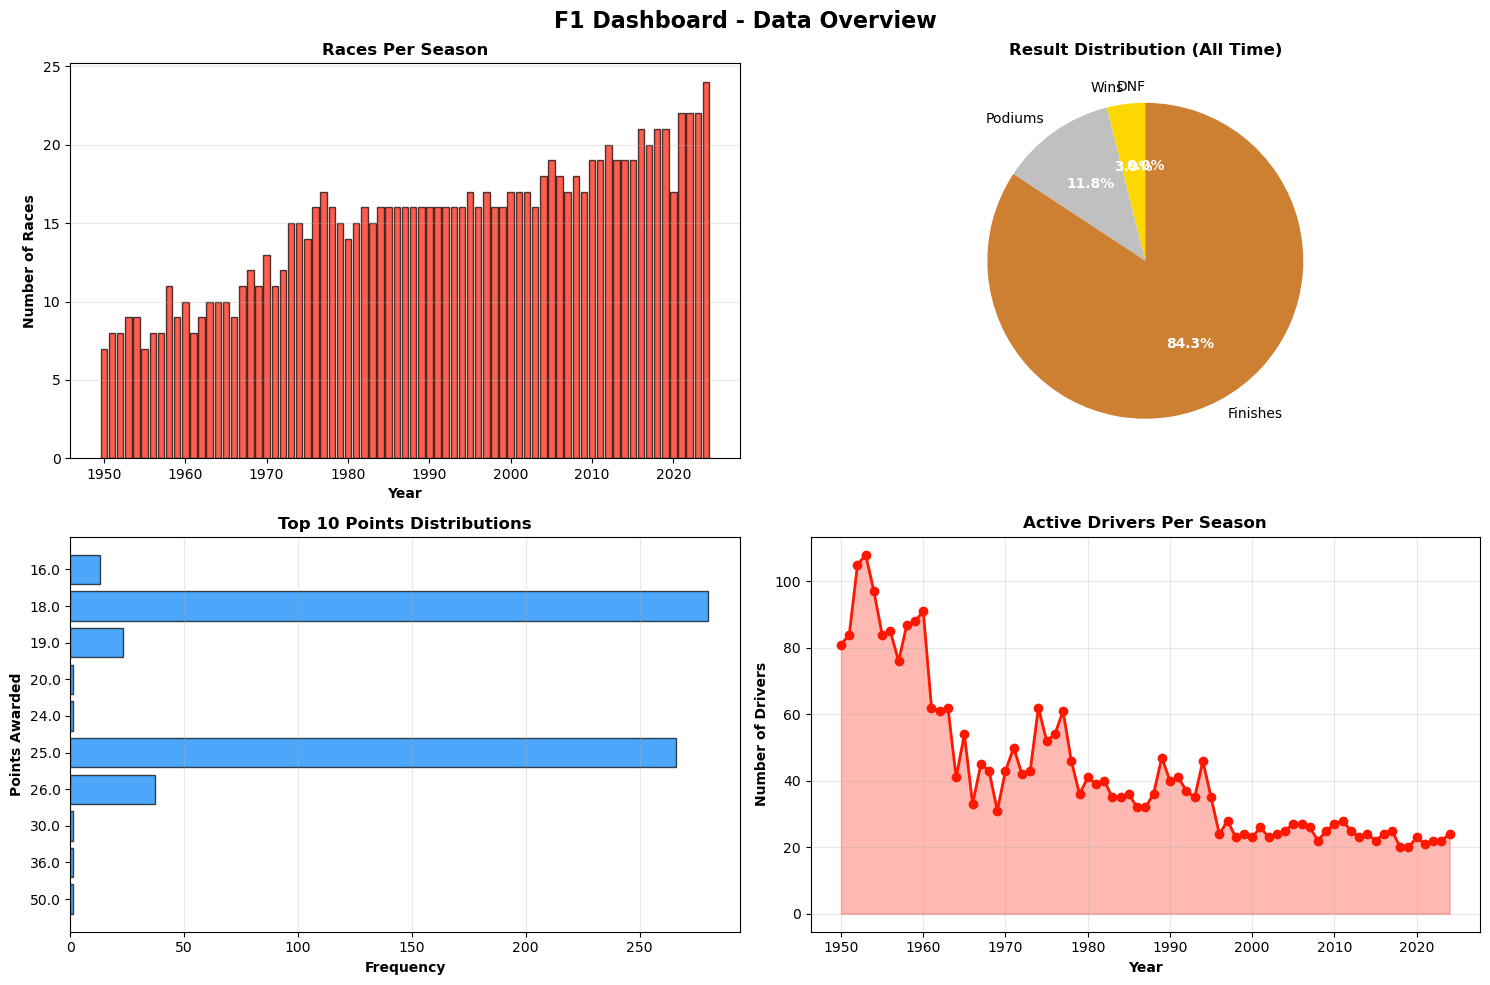

Overview visualization complete!


In [128]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('F1 Dashboard - Data Overview', fontsize=16, fontweight='bold')

# 1. Records by Year
ax = axes[0, 0]
races_by_year = final_df.groupby('year')['raceId'].nunique()
ax.bar(races_by_year.index, races_by_year.values, color='#FF1801', alpha=0.7, edgecolor='black')
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Number of Races', fontweight='bold')
ax.set_title('Races Per Season', fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# 2. Results Distribution
ax = axes[0, 1]
results_dist = final_df[['isWin', 'isPodium', 'isFinished', 'isDNF']].sum()
colors = ['#FFD700', '#C0C0C0', '#CD7F32', '#FF6B6B']
wedges, texts, autotexts = ax.pie(results_dist, labels=['Wins', 'Podiums', 'Finishes', 'DNF'], 
                                     autopct='%1.1f%%', colors=colors, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax.set_title('Result Distribution (All Time)', fontweight='bold')

# 3. Points Distribution
ax = axes[1, 0]
points_data = final_df[final_df['points'] > 0]['points'].value_counts().sort_index(ascending=False).head(10)
ax.barh(points_data.index.astype(str), points_data.values, color='#0082FA', alpha=0.7, edgecolor='black')
ax.set_xlabel('Frequency', fontweight='bold')
ax.set_ylabel('Points Awarded', fontweight='bold')
ax.set_title('Top 10 Points Distributions', fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# 4. Drivers per Year
ax = axes[1, 1]
drivers_by_year = final_df.groupby('year')['driverRef'].nunique()
ax.plot(drivers_by_year.index, drivers_by_year.values, marker='o', linewidth=2, 
        markersize=6, color='#FF1801')
ax.fill_between(drivers_by_year.index, drivers_by_year.values, alpha=0.3, color='#FF1801')
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Number of Drivers', fontweight='bold')
ax.set_title('Active Drivers Per Season', fontweight='bold')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Overview visualization complete!")


Top Performers Analysis

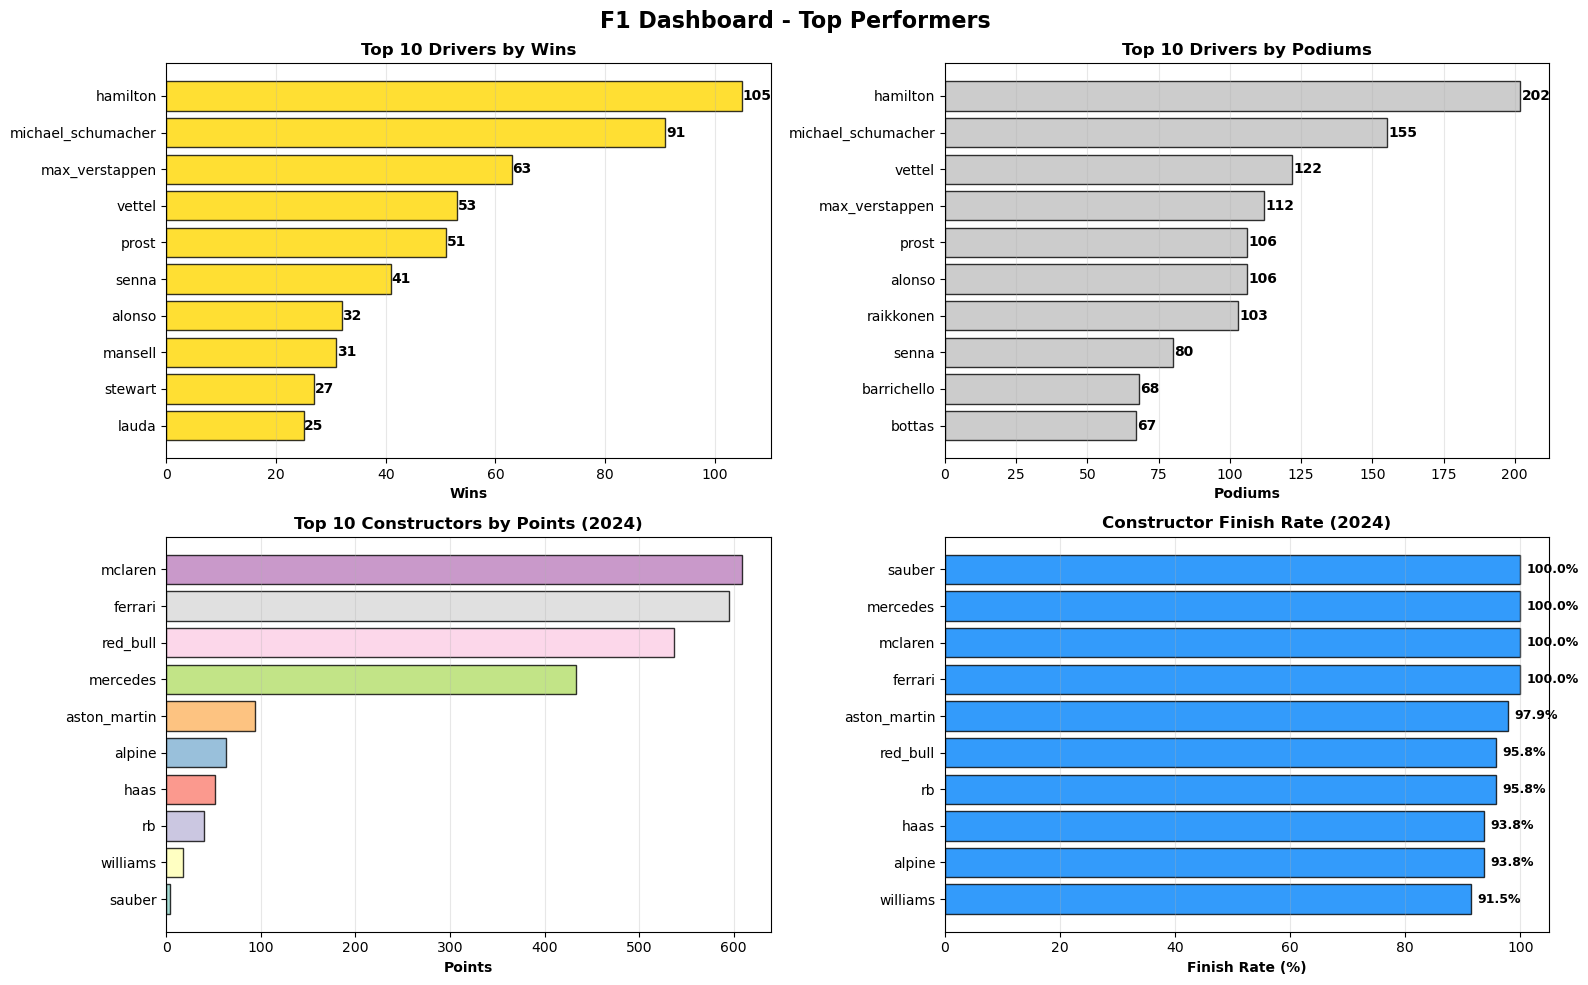

Top performers visualization complete!


In [130]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('F1 Dashboard - Top Performers', fontsize=16, fontweight='bold')

# 1. Top 10 Drivers by Wins
ax = axes[0, 0]
top_winners = final_df[final_df['isWin'] == 1].groupby('driverRef').size().sort_values(ascending=True).tail(10)
ax.barh(top_winners.index, top_winners.values, color='#FFD700', edgecolor='black', alpha=0.8)
ax.set_xlabel('Wins', fontweight='bold')
ax.set_title('Top 10 Drivers by Wins', fontweight='bold')
ax.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_winners.values):
    ax.text(v + 0.1, i, str(v), va='center', fontweight='bold')

# 2. Top 10 Drivers by Podiums
ax = axes[0, 1]
top_podiums = final_df[final_df['isPodium'] == 1].groupby('driverRef').size().sort_values(ascending=True).tail(10)
ax.barh(top_podiums.index, top_podiums.values, color='#C0C0C0', edgecolor='black', alpha=0.8)
ax.set_xlabel('Podiums', fontweight='bold')
ax.set_title('Top 10 Drivers by Podiums', fontweight='bold')
ax.grid(axis='x', alpha=0.3)
for i, v in enumerate(top_podiums.values):
    ax.text(v + 0.5, i, str(v), va='center', fontweight='bold')

# 3. Top 10 Constructors by Points (Recent Season)
ax = axes[1, 0]
recent_year = final_df['year'].max()
top_constructors = final_df[final_df['year'] == recent_year].groupby('constructorRef')['points'].sum().sort_values(ascending=True).tail(10)
colors_const = plt.cm.Set3(range(len(top_constructors)))
ax.barh(top_constructors.index, top_constructors.values, color=colors_const, edgecolor='black', alpha=0.8)
ax.set_xlabel('Points', fontweight='bold')
ax.set_title(f'Top 10 Constructors by Points ({recent_year})', fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# 4. Finish Rate by Constructor (Recent Season)
ax = axes[1, 1]
constructor_stats_recent = final_df[final_df['year'] == recent_year].groupby('constructorRef').agg({
    'isFinished': 'sum',
    'raceId': 'count'
}).reset_index()
constructor_stats_recent['finishRate'] = (constructor_stats_recent['isFinished'] / constructor_stats_recent['raceId'] * 100).round(2)
constructor_stats_recent = constructor_stats_recent.sort_values('finishRate', ascending=True).tail(10)
bars = ax.barh(constructor_stats_recent['constructorRef'], constructor_stats_recent['finishRate'], 
               color='#0082FA', edgecolor='black', alpha=0.8)
ax.set_xlabel('Finish Rate (%)', fontweight='bold')
ax.set_title(f'Constructor Finish Rate ({recent_year})', fontweight='bold')
ax.set_xlim(0, 105)
ax.grid(axis='x', alpha=0.3)
for i, v in enumerate(constructor_stats_recent['finishRate'].values):
    ax.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("Top performers visualization complete!")

Performance Metrics Visualization


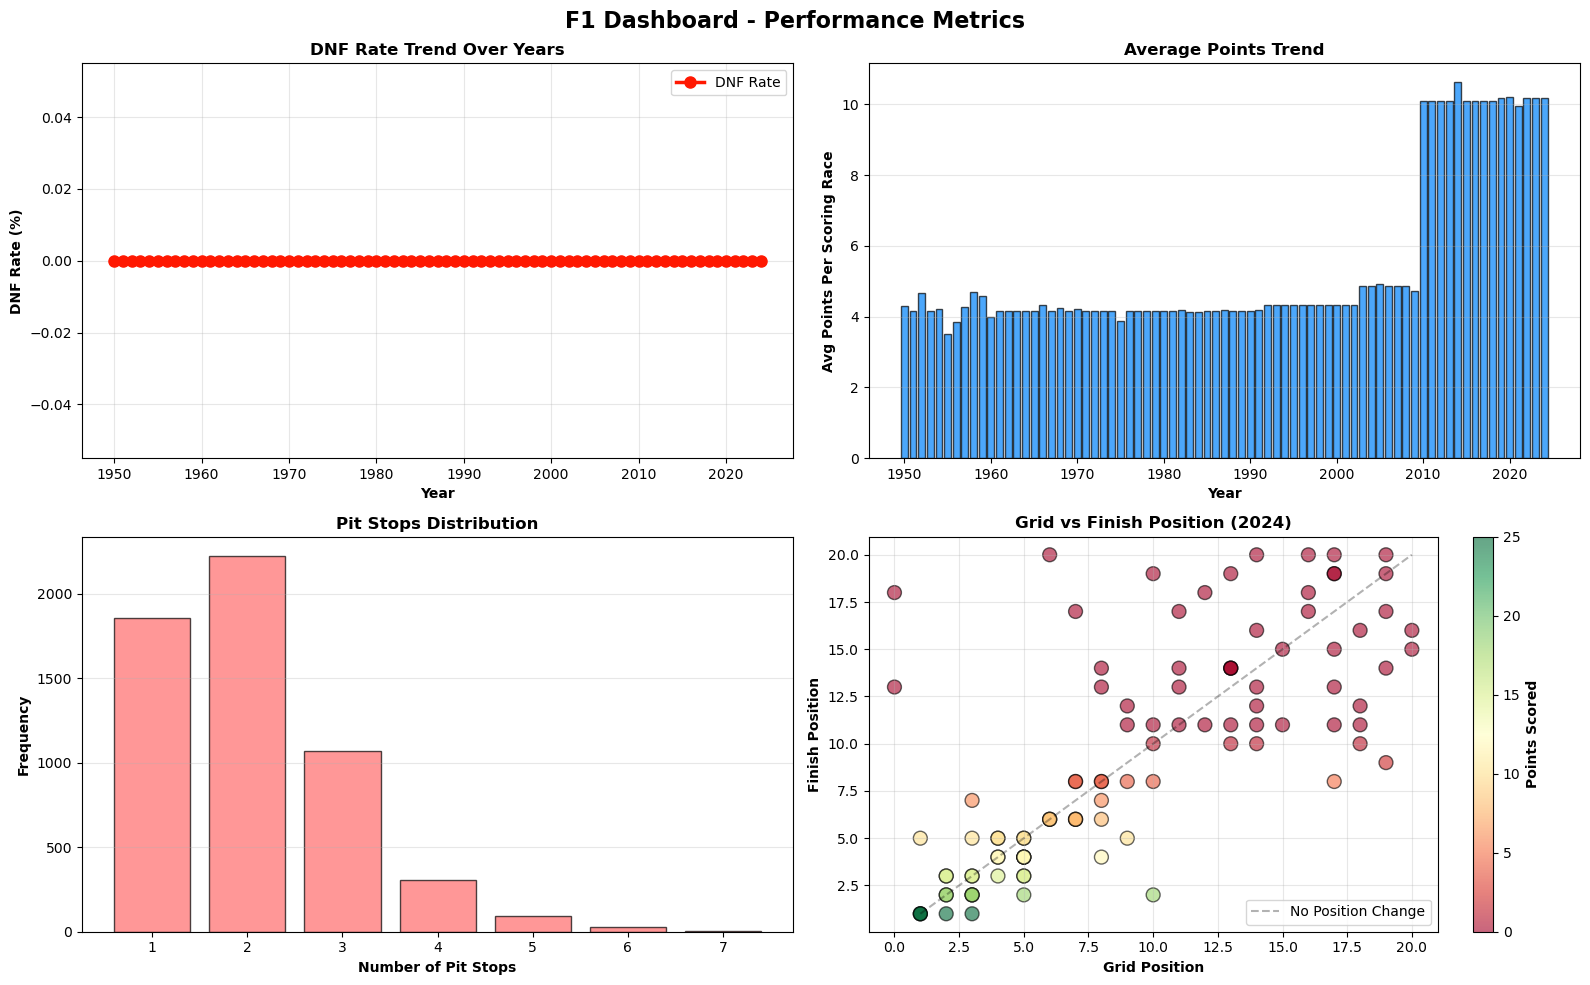

 Performance metrics visualization complete!


In [132]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('F1 Dashboard - Performance Metrics', fontsize=16, fontweight='bold')

# 1. DNF Rate by Year
ax = axes[0, 0]
dnf_by_year = final_df.groupby('year').agg({
    'isDNF': 'sum',
    'raceId': 'count'
}).reset_index()
dnf_by_year['dnfRate'] = (dnf_by_year['isDNF'] / dnf_by_year['raceId'] * 100)
ax.plot(dnf_by_year['year'], dnf_by_year['dnfRate'], marker='o', linewidth=2.5, 
        markersize=8, color='#FF1801', label='DNF Rate')
ax.fill_between(dnf_by_year['year'], dnf_by_year['dnfRate'], alpha=0.2, color='#FF1801')
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('DNF Rate (%)', fontweight='bold')
ax.set_title('DNF Rate Trend Over Years', fontweight='bold')
ax.grid(alpha=0.3)
ax.legend()

# 2. Average Points per Race by Year
ax = axes[0, 1]
avg_points_by_year = final_df[final_df['points'] > 0].groupby('year')['points'].mean()
ax.bar(avg_points_by_year.index, avg_points_by_year.values, color='#0082FA', alpha=0.7, edgecolor='black')
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Avg Points Per Scoring Race', fontweight='bold')
ax.set_title('Average Points Trend', fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# 3. Pit Stops Distribution
ax = axes[1, 0]
pit_stops_dist = final_df[final_df['pitStopsCount'] > 0]['pitStopsCount'].value_counts().sort_index()
ax.bar(pit_stops_dist.index, pit_stops_dist.values, color='#FF6B6B', alpha=0.7, edgecolor='black')
ax.set_xlabel('Number of Pit Stops', fontweight='bold')
ax.set_ylabel('Frequency', fontweight='bold')
ax.set_title('Pit Stops Distribution', fontweight='bold')
ax.grid(axis='y', alpha=0.3)
ax.set_xticks(pit_stops_dist.index)

# 4. Grid vs Finish Position (Latest Season)
ax = axes[1, 1]
latest_race = final_df[final_df['year'] == recent_year].copy()
sample_data = latest_race.sample(min(100, len(latest_race)))
scatter = ax.scatter(sample_data['grid'], sample_data['finishPosition'], 
                     c=sample_data['points'], cmap='RdYlGn', s=100, alpha=0.6, edgecolors='black')
ax.set_xlabel('Grid Position', fontweight='bold')
ax.set_ylabel('Finish Position', fontweight='bold')
ax.set_title(f'Grid vs Finish Position ({recent_year})', fontweight='bold')
ax.plot([1, max(latest_race['grid'].max(), latest_race['finishPosition'].max())], 
        [1, max(latest_race['grid'].max(), latest_race['finishPosition'].max())], 
        'k--', alpha=0.3, label='No Position Change')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Points Scored', fontweight='bold')
ax.grid(alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

print(" Performance metrics visualization complete!")


Constructor Championship Battle (Last 3 Seasons)


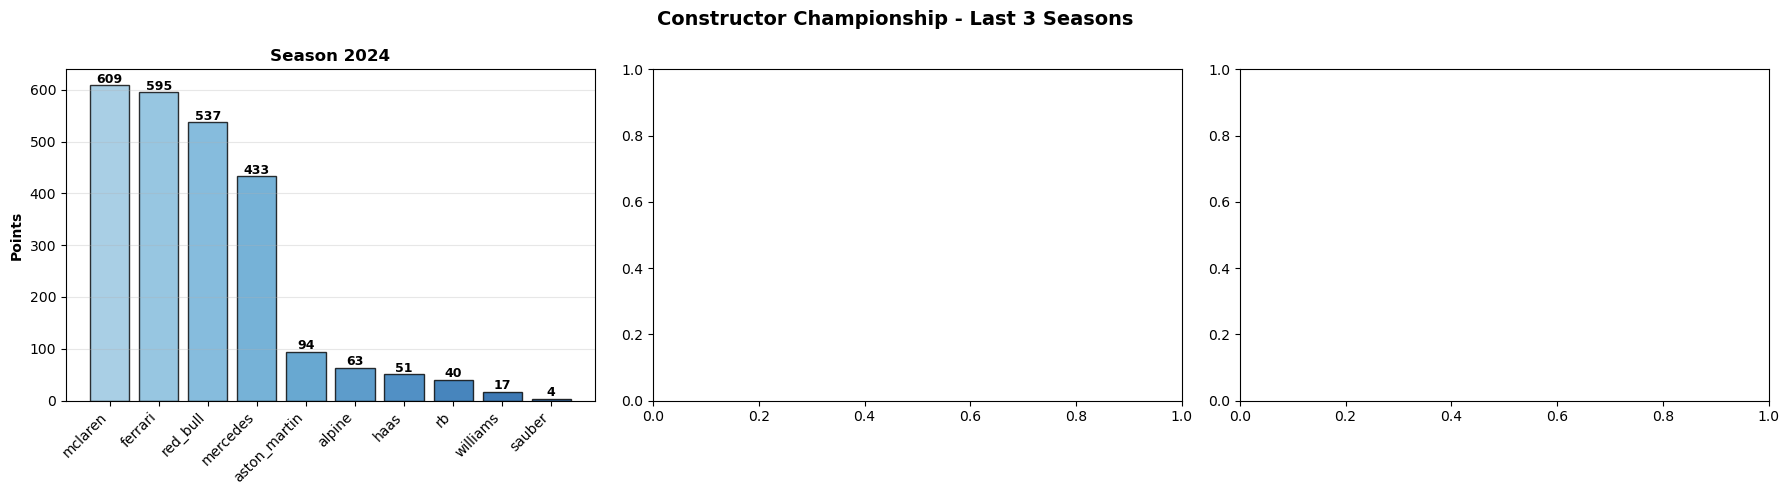

 Championship battle visualization complete!


In [134]:
last_3_seasons = final_df['year'].nlargest(3).unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Constructor Championship - Last 3 Seasons', fontsize=14, fontweight='bold')

for idx, year in enumerate(sorted(last_3_seasons)):
    ax = axes[idx]
    const_points = final_df[final_df['year'] == year].groupby('constructorRef')['points'].sum().sort_values(ascending=False).head(10)
    
    colors_gradient = plt.cm.Blues(np.linspace(0.4, 0.9, len(const_points)))
    ax.bar(range(len(const_points)), const_points.values, color=colors_gradient, edgecolor='black', alpha=0.8)
    ax.set_xticks(range(len(const_points)))
    ax.set_xticklabels(const_points.index, rotation=45, ha='right')
    ax.set_ylabel('Points', fontweight='bold')
    ax.set_title(f'Season {year}', fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(const_points.values):
        ax.text(i, v + 5, str(int(v)), ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print(" Championship battle visualization complete!")